<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Titanic_Survival_Prediction_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Mount Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Loading Our Model
path = "/content/drive/MyDrive/datasets/titanic.csv"

df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df = df.drop("Cabin", axis=1)

In [ ]:
#Fill Missing Values
df["Age"] = df["Age"].fillna(df["Age"].mean())

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<Axes: xlabel='Embarked', ylabel='count'>

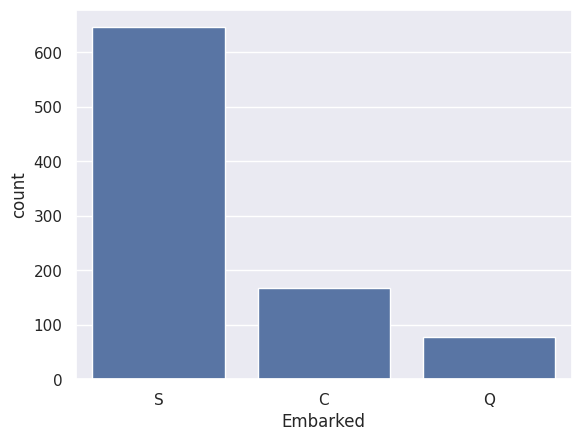

In [ ]:
#Exploratory Data Analysis
sns.set()
sns.countplot(x="Embarked", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

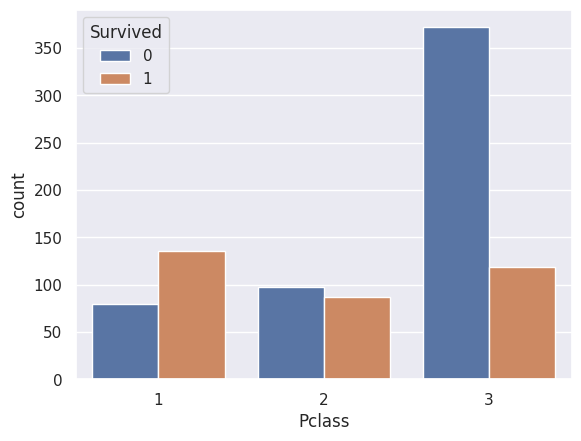

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=df)

<Axes: xlabel='Sex', ylabel='count'>

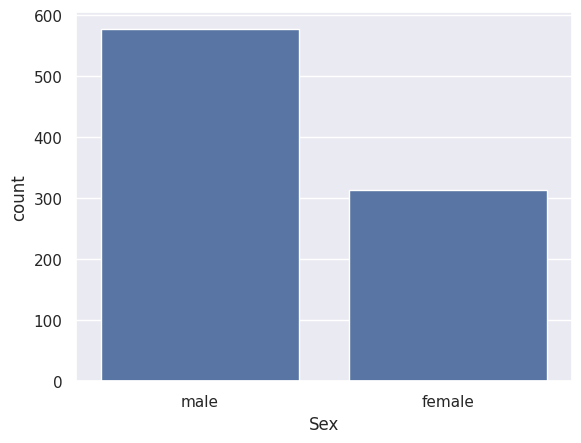

In [ ]:
sns.countplot(x="Sex", data=df)

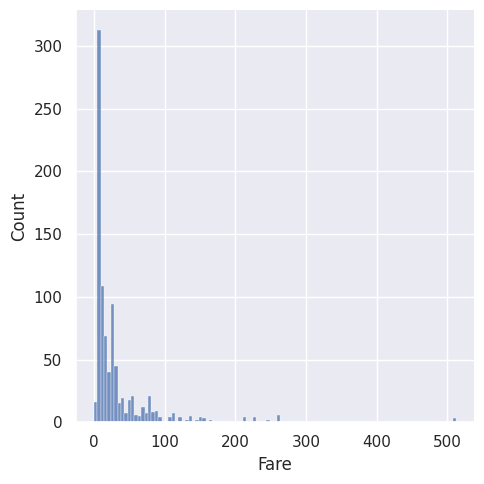

In [ ]:
sns.displot(df["Fare"])
#We gotta standardize our fare column

In [ ]:
#Drop columns we don't need
df = df.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
#Turn Categorical Values to Numerical Values
df.replace(
{
"Embarked": {"S":0, "Q":1, "C":2},
"Sex": {"female": 0, "male":1},
}, inplace=True
)

/tmp/ipython-input-4174527500.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(


<Axes: >

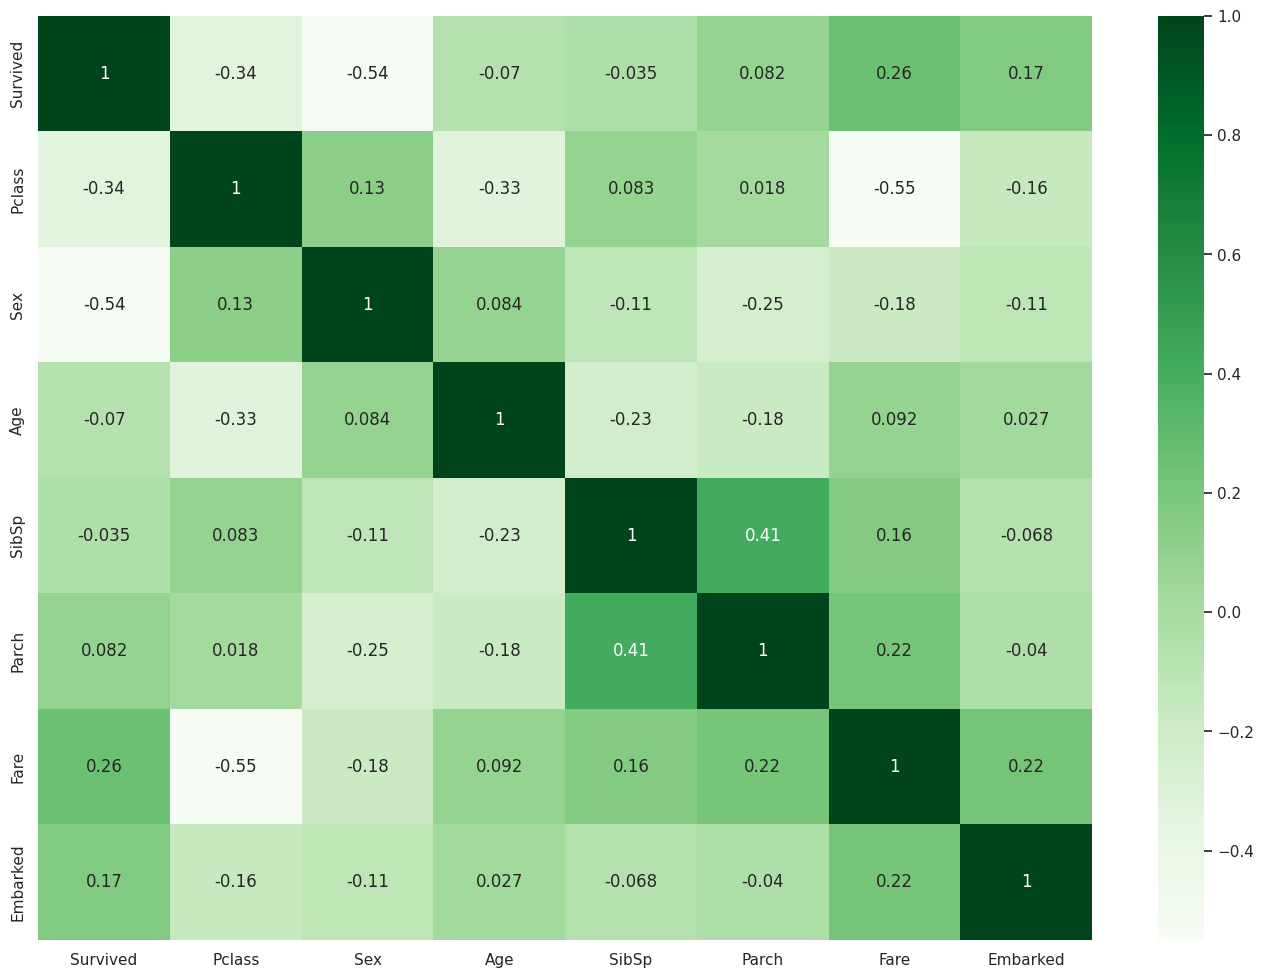

In [ ]:
#Correlation Matrix
corr = df.corr()

plt.figure(figsize=(17,12))
sns.heatmap(corr, annot=True, cmap="Greens")

In [ ]:
#Split our Data
X = df.drop("Survived", axis=1)
Y = df["Survived"]

In [ ]:
#Standardize our Data
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.15, random_state=10
)

In [ ]:
#Create our Model Function
def model_function(model):
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)

    #Accuracy
    accuracy = accuracy_score(y_test, prediction)
    matrix = confusion_matrix(y_test, prediction)
    score = cross_val_score(model, X, Y, cv=5)

    print("Accuracy: ", accuracy)
    print("Score: ", score)
    sns.heatmap(matrix, annot=True, cmap="Blues")

Accuracy:  0.8208955223880597
Score:  [0.7877095  0.80898876 0.85955056 0.76966292 0.85393258]


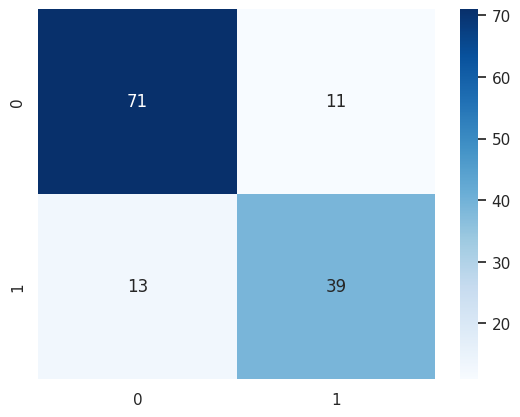

In [ ]:
forest = RandomForestClassifier(n_estimators=100)
model_function(forest)

Accuracy:  0.8582089552238806
Score:  [0.83240223 0.82022472 0.81460674 0.80337079 0.86516854]


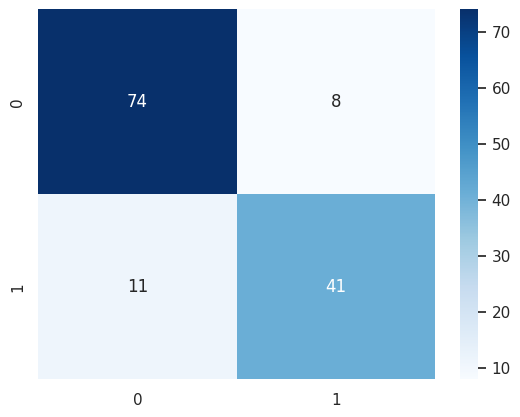

In [ ]:
svc = SVC()
model_function(svc)

Accuracy:  0.8283582089552238
Score:  [0.7877095  0.80337079 0.78089888 0.75842697 0.81460674]


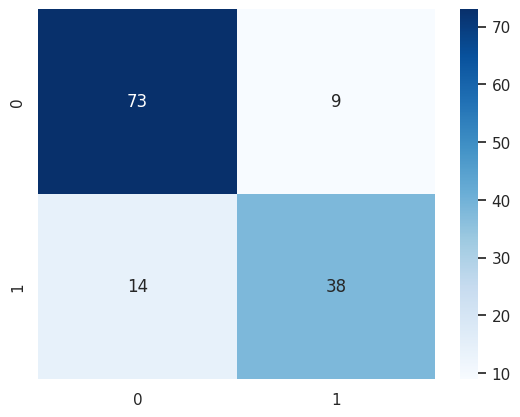

In [ ]:
linear = LinearSVC()
model_function(linear)

In [ ]:
#Save Model
import joblib

joblib.dump(svc, "titanic_survival_chatGPT.joblib")

['titanic_survival_chatGPT.joblib']